# 1. Introduction

Understanding customer behavior is one of the most crucial aspects of business growth. Companies often have thousands of customers with different purchasing habits, income levels, and interests. Managing and marketing to each customer individually is impractical.

To overcome this, businesses use **Customer Segmentation**, a data-driven approach that divides customers into meaningful groups (segments) with similar characteristics. This helps in designing targeted marketing strategies and improving customer satisfaction.

In this project, we use **Unsupervised Machine Learning** - specifically **K-Means Clustering** - to segment mall customers based on their **Age**, **Annual Income**, and **Spending Score**. By identifying customer clusters, the business can focus its marketing efforts more effectively.


# 2. Objective

The objective of this project is to **analyze and segment mall customers** into distinct groups using their demographic and spending patterns.

### Goals:
- Load and explore the **Mall Customers dataset**
- Preprocess and standardize the data
- Apply **K-Means Clustering** for segmentation
- Determine the optimal number of clusters using the **Elbow Method** and **Silhouette Score**
- Visualize clusters for better understanding
- Derive **business insights** from each segment


In [1]:
# 3. Importing Libraries and Loading Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 4. Exploratory Data Analysis (EDA)

Before building the model, we explore the dataset to understand its structure, missing values, and data distribution.

We’ll analyze:
- Data types and missing values
- Gender distribution
- Relationships between **Age**, **Annual Income**, and **Spending Score**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


C:\Users\Win-10\AppData\Local\Temp\ipykernel_3300\2589334206.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


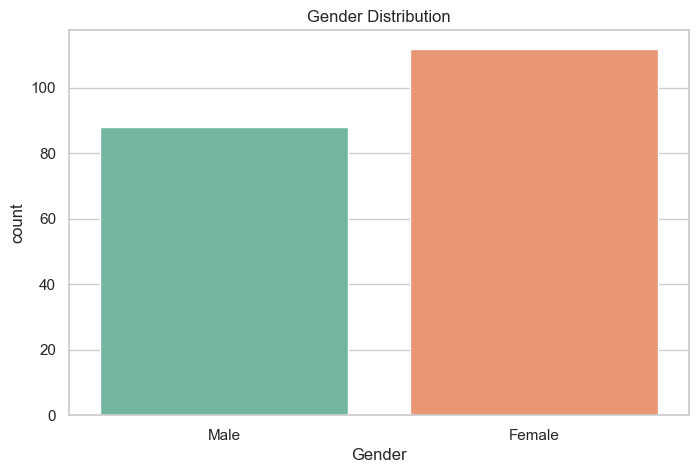

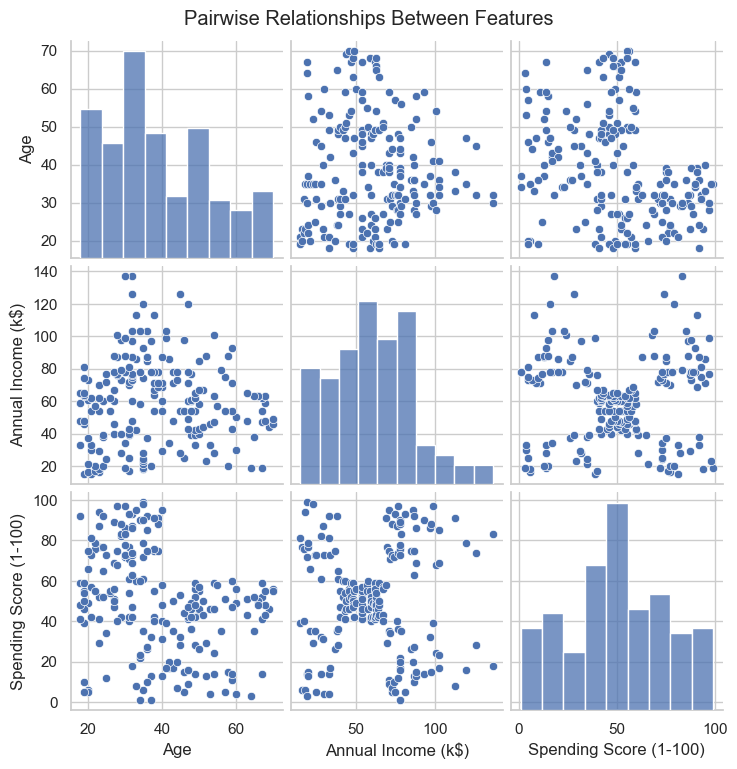

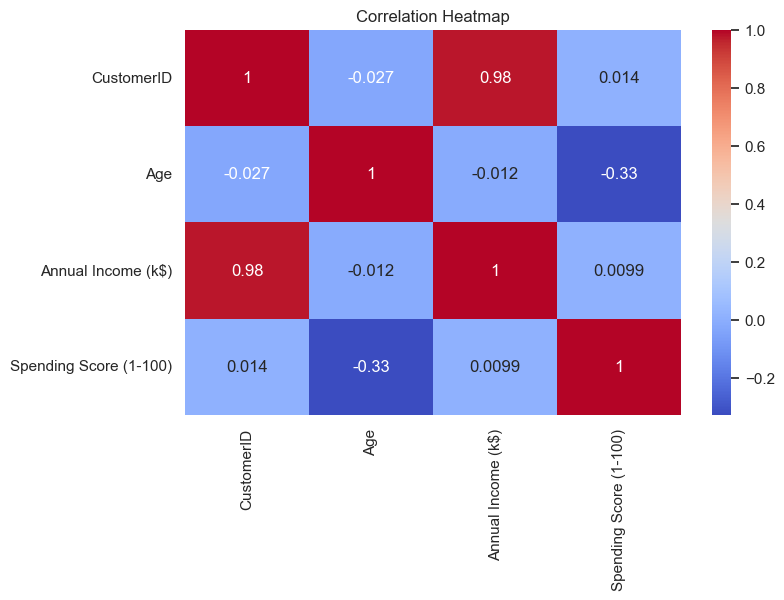

In [2]:
# Basic info
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

# Gender distribution
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

# Pairplot for numerical columns
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 5. Data Preprocessing

We select relevant features for clustering: **Age**, **Annual Income (k$)**, and **Spending Score (1-100)**.

Then, we standardize them using `StandardScaler` to bring all values to the same scale.

In [3]:
# Selecting features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data has been standardized successfully!")

Data has been standardized successfully!


# 6. Finding Optimal Number of Clusters

To find the most suitable number of clusters (k), we use:
1. **Elbow Method** – examines how the sum of squared errors (SSE) changes with k.
2. **Silhouette Score** – measures how well each point fits within its cluster.

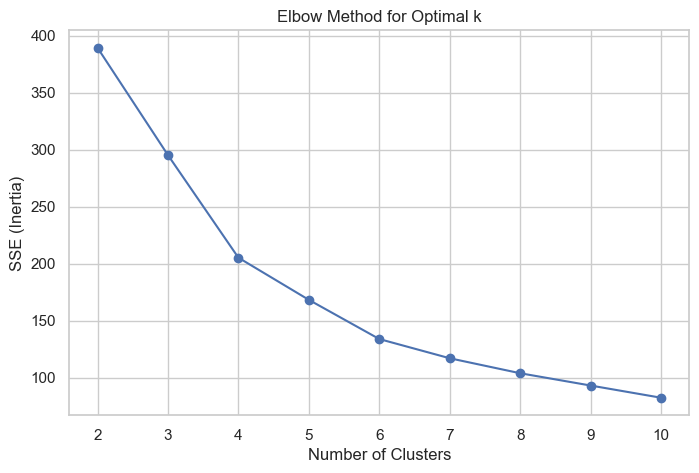

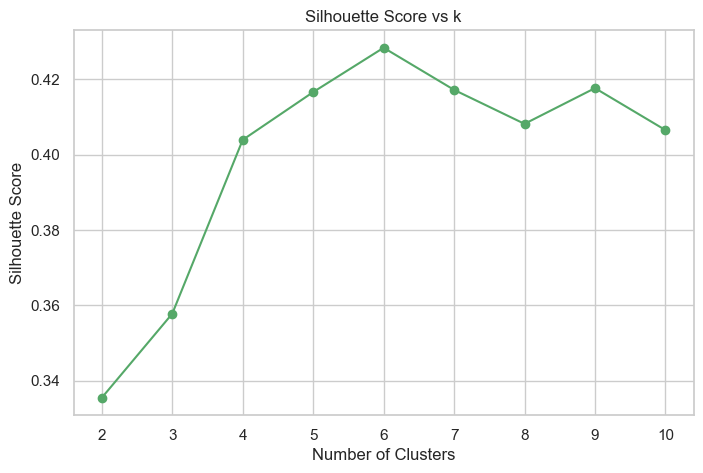

Optimal number of clusters based on Silhouette Score: 6


In [4]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Elbow plot
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.show()

# Silhouette plot
plt.plot(K, silhouette_scores, 'go-')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_k = K[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {best_k}")

# 7. Model Building - K-Means Clustering

We build the K-Means clustering model using the optimal number of clusters identified in the previous step.

In [5]:
# Building final model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=features)
centers_df

,Age,Annual Income (k$),Spending Score (1-100)
0,41.939394,88.939394,16.969697
1,56.333333,54.266667,49.066667
2,25.250000,25.833333,76.916667
3,32.692308,86.538462,82.128205
4,26.684211,57.578947,47.789474
5,45.523810,26.285714,19.380952


# 8. Visualization of Clusters

We visualize customer segments to interpret patterns in terms of **Income**, **Spending Score**, and **Age**.

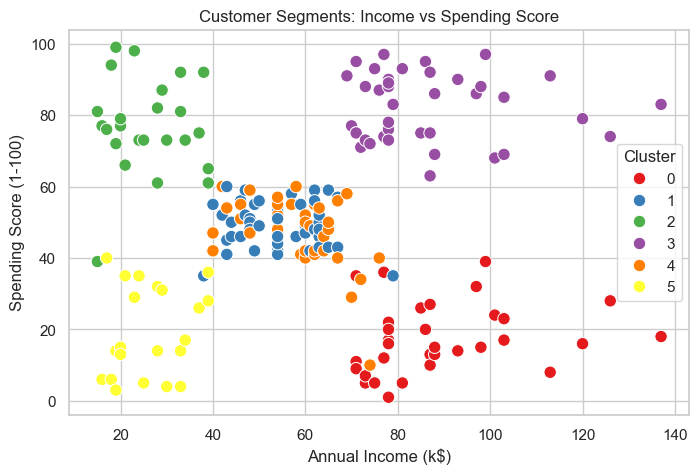

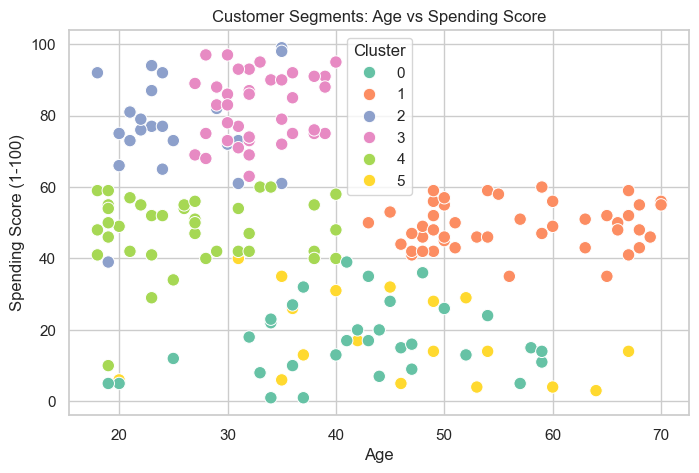

In [6]:
# Income vs Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=80)
plt.title("Customer Segments: Income vs Spending Score")
plt.show()

# Age vs Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=80)
plt.title("Customer Segments: Age vs Spending Score")
plt.show()

# 9. Insights and Business Interpretation

Based on the cluster centers (with 6 clusters), we can infer possible customer groups:

| Cluster | Description | Characteristics |
|---------|-------------|----------------|
| 0 | **High Income, High Spending** | Premium customers — brand loyal, willing to spend more |
| 1 | **High Income, Low Spending** | Conservative spenders — potential for luxury marketing |
| 2 | **Low Income, High Spending** | Young impulsive buyers — attract with offers and discounts |
| 3 | **Low Income, Low Spending** | Budget customers — focus on value-for-money |
| 4 | **Middle Income, Moderate Spending** | Average group — steady, less reactive |
| 5 | **Middle Income, High Spending / Transitional Segment** | Opportunity to upsell or target for loyalty campaigns |

Understanding these segments allows the mall to:
- Design **targeted promotions**
- Optimize **inventory and pricing**
- Improve **customer satisfaction** and **loyalty**

# 10. Conclusion and Future Scope

### Conclusion
In this project, we successfully implemented **K-Means Clustering** for customer segmentation using the Mall Customers dataset.  
The model identified distinct groups of customers based on their age, income, and spending patterns.  
These insights can guide businesses to:
- Tailor marketing campaigns for each segment  
- Identify high-value customers  
- Improve retention strategies

### Future Scope
To enhance the project further:
- Include more features like **customer tenure, frequency of visits, or purchase categories**  
- Experiment with advanced algorithms like **DBSCAN**, **Hierarchical Clustering**, or **Gaussian Mixture Models (GMM)**  
- Integrate visualization dashboards using **Tableau** or **Power BI**  
- Apply **PCA or t-SNE** for dimensionality reduction and improved visualization

### References
- [Kaggle: Mall Customers Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)
- [Scikit-learn Documentation](https://scikit-learn.org/stable/modules/clustering.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- Internship Guidelines — *Corizo Edutech Pvt. Ltd.*